
# Project: Investigate a Dataset - [No-Show Appointments]




<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.  
The indicators are:	
* Gender-  Male or Female   
* ScheduledDay-  day the patient set up their appointment  
* Age
* Gender- M, F
* Neighbourhood-  location of the hospital  
* Scholarship- whether or not the patient is enrolled in Brasilian welfare program Bolsa Família  
* Bolsa Família- a social wefare program that provided financial assistance to Brazilian famlies  
* Hipertension- True or False	 
* Diabetes- True or False  
* Alcoholism-	True or False  
* Handcap- True or False  
* SMS_received-	number of SMS reminders received   
* No-show- True or False  


 ### Question(s) for Analysis
> Eventually, we need to answer the following question from the analysis of the dataset:
*  Are reminders helpful?
*  What percentage of people show up for appointments?
*  Do scholarships encourage people more?
*  Is there any correlation between age/gender and showing up for appointments?
*  What other factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?



This analysis involved data wrangling, exploratory analysis, vizualisation and drawing conclusions. 

In [201]:
# Import all the libraries needed for analysis

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


<a id='wrangling'></a>
## Data Wrangling

Here, we wil proceed to correctly format our data, check if we have duplicates, drop unnecessary colums and other data wrangling functions. 



In [202]:
#First, we load the data
df =  pd.read_csv('hospital_data.csv')
#Get a glimpse of the data
df.head(10)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,9.598513e+13,5626772,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,No
6,7.336882e+14,5630279,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,3.449833e+12,5630575,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0,Yes
8,5.639473e+13,5638447,F,2016-04-29T08:02:16Z,2016-04-29T00:00:00Z,21,ANDORINHAS,0,0,0,0,0,0,No
9,7.812456e+13,5629123,F,2016-04-27T12:48:25Z,2016-04-29T00:00:00Z,19,CONQUISTA,0,0,0,0,0,0,No


Let's take a look at the columns by creating a function to print the column names. 

In [203]:
def print_columns(df):
    for column in df.columns:
        print(column)
        
print_columns(df)

PatientId
AppointmentID
Gender
ScheduledDay
AppointmentDay
Age
Neighbourhood
Scholarship
Hipertension
Diabetes
Alcoholism
Handcap
SMS_received
No-show


#### After successfully loading our data, we need some more information like the number of rows and columns and the datatypes. 

In [204]:
df.shape

(110527, 14)

The data has 14 columns with 110527 observations. 

In [205]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


#### Let's check if there are any duplicate values.

In [206]:
sum(df.duplicated())

0

No duplicates!

Taking a look at the information we have on the data types of the columns, we do not have missing data. However, it can be seen that the timestamp data are incorrectly formatted. Let's go ahead and format our datetime columns. 

In [207]:
# to convert ScheduledDay and AppointmentDay to date time
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])
# if the changes were made
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       110527 non-null  float64            
 1   AppointmentID   110527 non-null  int64              
 2   Gender          110527 non-null  object             
 3   ScheduledDay    110527 non-null  datetime64[ns, UTC]
 4   AppointmentDay  110527 non-null  datetime64[ns, UTC]
 5   Age             110527 non-null  int64              
 6   Neighbourhood   110527 non-null  object             
 7   Scholarship     110527 non-null  int64              
 8   Hipertension    110527 non-null  int64              
 9   Diabetes        110527 non-null  int64              
 10  Alcoholism      110527 non-null  int64              
 11  Handcap         110527 non-null  int64              
 12  SMS_received    110527 non-null  int64              
 13  No-show       

#### Some columns won't be needed for our analysis. Let's remove such columns to condense our data. 

In [208]:
df.drop(['PatientId','AppointmentID', 'AppointmentDay'], axis=1, inplace = True)
#call on the print_columns function to check the columns we have left
print_columns(df)

Gender
ScheduledDay
Age
Neighbourhood
Scholarship
Hipertension
Diabetes
Alcoholism
Handcap
SMS_received
No-show


#### At first glance, the No-show column seems a bit confusing as No means Yes and vice versa. Let's rename the column and its values to improve clarity.

In [209]:
#renaming the data in No-show column to increase clarity
df.rename(columns = {'No-show':'Showed_up'}, inplace=True)

df['Showed_up'].replace({'No':'showed_up', 'Yes':'no_show'}, inplace=True)
df.head()

,Gender,ScheduledDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Showed_up
0,F,2016-04-29 18:38:08+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,showed_up
1,M,2016-04-29 16:08:27+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,showed_up
2,F,2016-04-29 16:19:04+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,showed_up
3,F,2016-04-29 17:29:31+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,showed_up
4,F,2016-04-29 16:07:23+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,showed_up


The 'No-show' column has been renamed to 'Showed_up.' The 'Yes' values have been renamed to 'no_show' and the 'No' values have been renamed to 'showed_up.'

We should also name the Hipertension and Handcap columns correctly. We can also insert a seperator n the ScheduledDay column.

In [210]:
#renaming the columns
#create a dictionary
dict = {'Hipertension':'Hypertension', 'Handcap':'Handicap', 'ScheduledDay':'Scheduled_Day'}
#use rename fuunction
df.rename(columns=dict, inplace=True)
#cal on print_column function
print_columns(df)

Gender
Scheduled_Day
Age
Neighbourhood
Scholarship
Hypertension
Diabetes
Alcoholism
Handicap
SMS_received
Showed_up


The Hipertension column is now labeled as 'Hypertension' while the Handcap column is now labeled as 'Handicap.'

Let's check for wrong age values

In [211]:
df.loc[df['Age']<0]

,Gender,Scheduled_Day,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,Showed_up
99832,F,2016-06-06 08:58:13+00:00,-1,ROMÃO,0,0,0,0,0,0,showed_up


We have an age value below one. Let's drop it. 

In [212]:
df.drop(index=(df.loc[df['Age']<0].index), axis=0,inplace=True)

In [213]:
#let's see if that worked
df.query('Age<0')

,Gender,Scheduled_Day,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,Showed_up


Let's make column names all lower caps

In [214]:
df.columns = df.columns.str.lower()

In [215]:
print_columns(df)

gender
scheduled_day
age
neighbourhood
scholarship
hypertension
diabetes
alcoholism
handicap
sms_received
showed_up


I think the data is clean and organized enough. On to the next stage!

<a id='eda'></a>
## Exploratory Data Analysis

> Now that we have cleaned and wrangled our data, it's time to explore our data. Here, we will seek to find patterns, visualize reationships and get to know our data better. We will start by taking a view of the whole data through a individual visualization, then we narrow it down to the most important variables. 
The most mportant question to be answered is:

#### What factors influence the amount of people who showed up for their appointments?

 Let's start with some summary statistics of the numerical data and explore our data.

In [216]:
df.describe()

,age,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received
count,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,37.089219,0.098266,0.197248,0.071865,0.030400,0.022248,0.321029
std,23.110026,0.297676,0.397923,0.258266,0.171686,0.161543,0.466874
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


From this, we can see that the average age is 37, even though there seems to be an outlier in the age which is 117. 

Now, let's take a look at the histograms depicting our numerical data.

array([[<AxesSubplot:title={'center':'scheduled_day'}>,
        <AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'scholarship'}>],
       [<AxesSubplot:title={'center':'hypertension'}>,
        <AxesSubplot:title={'center':'diabetes'}>,
        <AxesSubplot:title={'center':'alcoholism'}>],
       [<AxesSubplot:title={'center':'handicap'}>,
        <AxesSubplot:title={'center':'sms_received'}>, <AxesSubplot:>]],
      dtype=object)

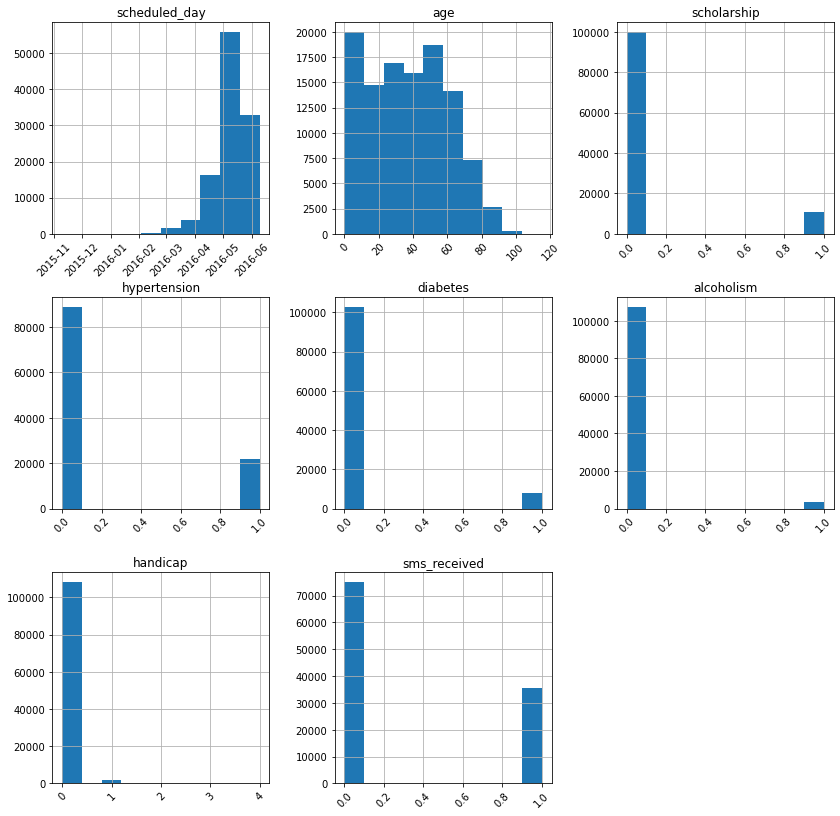

In [217]:
df.hist(figsize=(14,14), xrot=45)

#### Summary statistics of the categorical data

In [218]:
df.describe(include = 'object')

,gender,neighbourhood,showed_up
count,110526,110526,110526
unique,2,81,2
top,F,JARDIM CAMBURI,showed_up
freq,71839,7717,88207


From this, we can make inferences about our categories. We can say that more Females were registered for the appointments. The neighbourhood that had the most peope was Jadim Camburi. Also, we had a higher number of people that showed up to the appointments than hose who did not.

#### Lets take a look at the percentage of the people that showed up for the appointments.

In [219]:
df['showed_up'].value_counts()

showed_up    88207
no_show      22319
Name: showed_up, dtype: int64

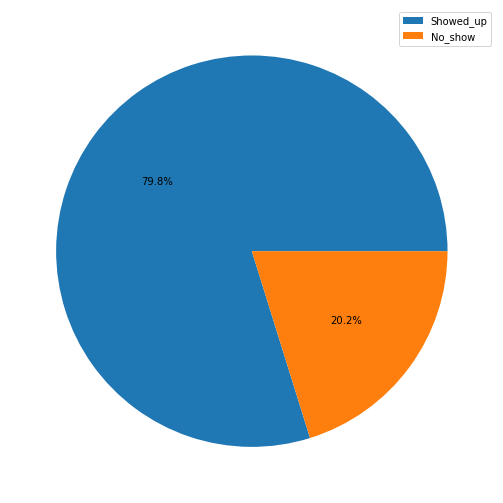

In [220]:
#plot pie chart with percentages
total_sum = df['showed_up'].value_counts().sum()
fig1, ax1 = plt.subplots(figsize=(10, 9))
pie = ax1.pie(df['showed_up'].value_counts(), autopct='%1.1f%%')

pie_labels=['Showed_up','No_show']
plt.legend(loc='best', labels=pie_labels)

### 1. Is there any correlation between the numerical features and patients showing up?

Let's check for correlation between the variables using the .corr function

In [221]:
corr = df.corr()
corr

,age,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received
age,1.000000,-0.092463,0.504586,0.292391,0.095810,0.078032,0.012633
scholarship,-0.092463,1.000000,-0.019730,-0.024894,0.035022,-0.008587,0.001192
hypertension,0.504586,-0.019730,1.000000,0.433085,0.087970,0.080083,-0.006270
diabetes,0.292391,-0.024894,0.433085,1.000000,0.018473,0.057530,-0.014552
alcoholism,0.095810,0.035022,0.087970,0.018473,1.000000,0.004647,-0.026149
handicap,0.078032,-0.008587,0.080083,0.057530,0.004647,1.000000,-0.024162
sms_received,0.012633,0.001192,-0.006270,-0.014552,-0.026149,-0.024162,1.000000


Let's visualize this to make it readable!

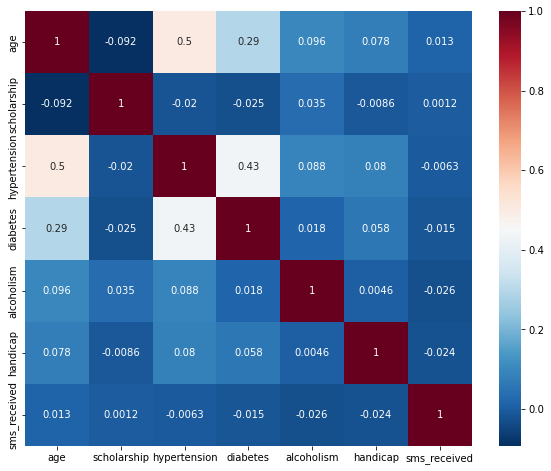

In [222]:
plt.figure(figsize=(10, 8,))
sns.heatmap(corr, cmap='RdBu_r', annot=True)
plt.show()

There seems to be a correlation between age and hypertension.Also, diabetes and hypertension. This means that older people tend to have answered 'True' to hypertension more than younger people. 
Asides that, there seems to be no other strong correlation between our variables and patients showing up.

### 2. Is the patient's appearance affected by gender?

[Text(0.5, 1.0, 'Showed-up V Gender')]

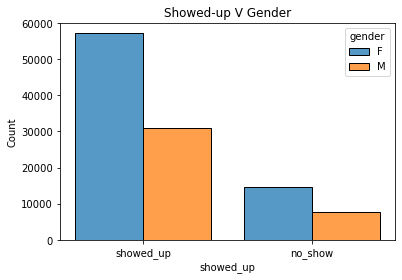

In [223]:
#plot showed_up against sms gender

sns.histplot(data=df, x='showed_up', hue='gender', multiple='dodge', shrink=.8).set(title='Showed-up V Gender')

From the chart above, we can see that we had more females show up than males. Certainly more women are concerned about not missing their apointments. 

### 3. Is the patient's appearance affected by reminders?

Let's see a count of the sms_received column.

In [224]:
df['sms_received'].value_counts()

0    75044
1    35482
Name: sms_received, dtype: int64

[Text(0.5, 1.0, 'Showed-up V SMS Received')]

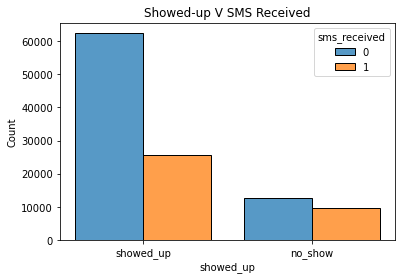

In [225]:
#plot showed_up against sms received
sns.histplot(data=df, x='showed_up', hue='sms_received', multiple='dodge', shrink=.8).set(title='Showed-up V SMS Received')

We can see most of the people who did not show up for their appointments did not receive reminders. 

### 4. Is the patient's appearance affected by the welfare scholarship?

[Text(0.5, 1.0, 'Showed-up V Scholarship')]

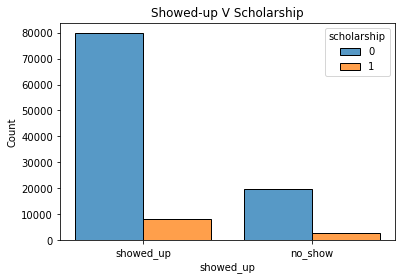

In [226]:
#plot showed_up against scholarship
sns.histplot(data=df, x='showed_up', hue='scholarship', multiple='dodge', shrink=.8).set(title='Showed-up V Scholarship')

From the chart above, we can see that most of the peopel that did not show did not have scholarships. However, most of the people who showed also did not have have scholarship. 

### 5. Do older people attend the appointments more?

We'll analyse this by creating a new category called age group which divides the patients into different age groups. We will then visualize it against the sms_received columnn.This way we can see what age category shows up for the appointments the most.

In [227]:
#Let's view a summary of the age column
df.describe().age

count    110526.000000
mean         37.089219
std          23.110026
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: age, dtype: float64

In [228]:
#set the parameters for the new column based on the distribution of the age column
bins=[0, 18, 37, 55, 115]
labels=['children', 'young adults', 'middle-aged adults', 'elderly']

In [229]:
#create the column
df['age_group'] = pd.cut(df['age'],bins,labels=labels)

In [230]:
#check it was created successfully
df.head()

,gender,scheduled_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,showed_up,age_group
0,F,2016-04-29 18:38:08+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,showed_up,elderly
1,M,2016-04-29 16:08:27+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,showed_up,elderly
2,F,2016-04-29 16:19:04+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,showed_up,elderly
3,F,2016-04-29 17:29:31+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,showed_up,children
4,F,2016-04-29 16:07:23+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,showed_up,elderly


Now, let's visualize!

[Text(0.5, 1.0, 'Showed-up V Age Group')]

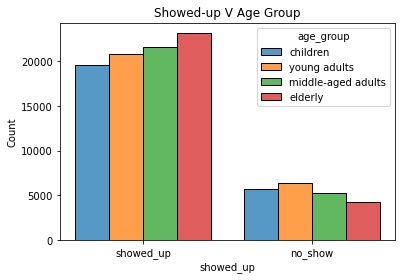

In [231]:
sns.histplot(data=df, x='showed_up', hue='age_group', multiple='dodge', shrink=.8).set(title='Showed-up V Age Group')

From this, we can see that most of the patients who showed up belong to the elderly category, followed closely by middle-aged people.

### 6. Do handicapped people attend the appointments less?

[Text(0.5, 1.0, 'Showed-up V Handicap')]

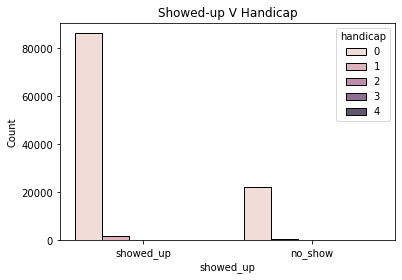

In [232]:
#plot showed_up against handicap
sns.histplot(data=df, x='showed_up', hue='handicap', multiple='dodge', shrink=.8).set(title='Showed-up V Handicap')

We might have to drop all the values except from 0 and 1 so we can get a better picture.

In [233]:
df.drop(index=(df.loc[df['handicap']>1].index), axis=0,inplace=True)

Let's replot the diagram now.

[Text(0.5, 1.0, 'Showed-up V Handicap')]

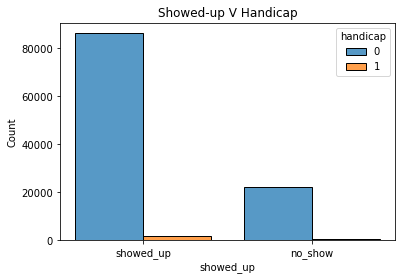

In [234]:
#plot showed_up against handicap
sns.histplot(data=df, x='showed_up', hue='handicap', multiple='dodge', shrink=.8).set(title='Showed-up V Handicap')

From this, we can see that most of the people that showed up answered False to being handicapped. It could be because handicapped or diferently abled people might fnd it harder to attend appointments because they require more assistance in moving around.

<a id='conclusions'></a>
## Conclusions

> Patients are hardly affected by the features. 

> More than half of the patients who registered for their appointments attended.

> More females than males showed up for their appointments.

>The welfare scholarship seems to have no strong correlation with patients attending their appointments. It is unclear whther the scholarship affects showing up.

>The neighbourhood that had more patients who attended is Jardin Camburi. 

>Provisions should be made or handicapped people so they can attend their appointments with ease.

>We had more elderly people show up than young people. 


## Limitations

> It would be helpful to know the income level of the patients. This way, we can predit the group that would miss their appointments the most.

>It would also be helpful to know the distance between each neighbourhood and the hospital. This can prove wheter or not distanc is a factor. 

In [235]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

4294967295